# Identificação

- Discente: Helder Mateus dos Reis Matos
- Matrícula: 202520080003
- Disciplina: Fundamentos de Inteligência Computacional e Ciência de Dados
- Docente: Claudomiro de Souza de Sales Junior
- Tarefa: Atividade 04 - Programas em Python for p-value, confidence intervals e correlation

- Link para o Colab (modo leitura): 

# 0. Configurações

In [1]:
import itertools
import time
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from scipy.stats import linregress

sns.set_style("whitegrid")

# 1. Correlação

_Faça plotes similares as duas figuras mostradas nos dois próximos slides._

_Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira._

_Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress._

_Calcule a covariância e interprete os resultados._

<div style="display: flex; justify-content: center; gap: 10px;">
    <img src="https://github.com/hellsdeur/ficcd-ppgcc-2025/blob/main/atividade04/imagens/1a.png?raw=true" alt="Figura 1A" width="400px">
    <img src="https://github.com/hellsdeur/ficcd-ppgcc-2025/blob/main/atividade04/imagens/1b.png?raw=true" alt="Figura 1B" width="400px">
</div>

In [2]:
rsup = 10
rinf = 0
sample_size = 9

sample1 = np.random.uniform(rsup, rinf, sample_size)

sample2x = np.random.uniform(rsup, rinf, sample_size)
sample2y = np.random.uniform(rsup, rinf, sample_size)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(sample1, sample1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(sample2x, sample2y)

print("Sample 1: ", sample1)
print("Sample 2x: ", sample2x)
print("Sample 2y: ", sample2y)

print(f"Regression 1: slope: {slope1}, intercept: {intercept1}, r_value: {r_value1}, p_value: {p_value1}, std_err: {std_err1}")
print(f"Regression 2: slope: {slope2}, intercept: {intercept2}, r_value: {r_value2}, p_value: {p_value2}, std_err: {std_err2}")

Sample 1:  [5.13037324 6.86292966 5.8780707  6.20378673 5.67122066 5.75043347
 7.75195793 7.60173339 8.6940046 ]
Sample 2x:  [0.29415279 1.66604529 9.59624299 1.26073358 9.42405389 7.43525816
 1.35687106 6.52201293 9.70991662]
Sample 2y:  [3.91194182 3.23660016 5.86421701 7.93970322 1.75688553 6.36362086
 1.79391234 1.77593482 3.00872249]
Regression 1: slope: 1.0, intercept: 0.0, r_value: 1.0, p_value: 3.292585384803146e-70, std_err: 0.0
Regression 2: slope: -0.05569760561556262, intercept: 4.253789064553807, r_value: -0.09960134908939819, p_value: 0.7987637487211015, std_err: 0.21030874634686125


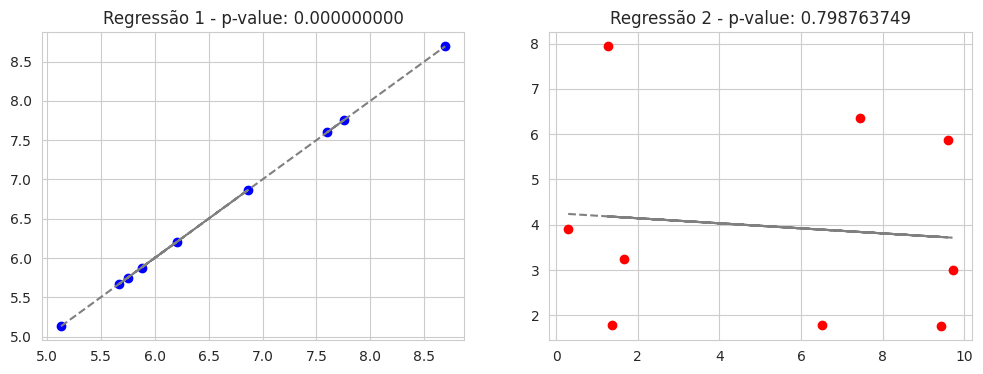

In [3]:
fig1, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(sample1, sample1, color="blue")
axs[0].plot(sample1, slope1 * sample1 + intercept1, color="gray", linestyle="--")
axs[0].set_title(f"Regressão 1 - p-value: {p_value1:.9f}")
axs[0].grid(True)

axs[1].scatter(sample2x, sample2y, color="red")
axs[1].plot(sample2x, slope2 * sample2x + intercept2, color="gray", linestyle="--")
axs[1].set_title(f"Regressão 2 - p-value: {p_value2:.9f}")
axs[1].grid(True)

$$cov_{x,y} = \frac{\sum(x_{i} - \overline{x})(y_{i} - \overline{x})}{n-1}$$

Onde:

- $x_{i}$ é o i-ésimo valor de $x$;
- $y_{i}$ é o i-ésimo valor de $y$;
- $\overline{x}$ é a média de $x$;
- $\overline{y}$ é a média de $y$;
- $n$ é a quantidade de valores.

In [4]:
def covariance(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov = np.sum((x - mean_x) * (y - mean_y)) / n
    return cov

In [5]:
cov1 = covariance(sample1, sample1)
print(f"Covariance 1: {cov1}")

Covariance 1: 1.244945311845238


In [6]:
cov2 = covariance(sample2x, sample2y)
print(f"Covariance 2: {cov2}")

Covariance 2: -0.8111589302500298


# 2. Estimando um Intervalo de Confiança para a Média

_Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.)._

_Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:_

- _Calcular a média e o desvio padrão da amostra._
- _Usar a fórmula para intervalo de confiança ou a biblioteca `scipy.stats`._

_Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados._

_Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade._

# 3. P-value em um Teste de Hipótese

_Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste._

- _Formule a hipótese nula._
- _Realizar um teste t de duas amostras usando `scipy.stats.ttest_ind`._

_Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um  nível de significância dado (por exemplo, 0,05)._

# 4. Significance level

_Faça slides explicando o código abaixo e interpretando os resultados_

https://colab.research.google.com/drive/13V7IT7XbnNVf4VVehObHO6NZUxaqdl_f?usp=sharing

_Teste com dois valores para significance_level_

_Pelo menos quatro slides com a explicação e interpretação._

# 5. Reproduzindo slides em código

Reproduza em Python o conteúdo dos [slides de 24 a 46](https://docs.google.com/presentation/d/1gMKonLnK3buDUGGJGt1AAS-Ki3jT93LZ/edit?usp=sharing&ouid=115043904090702383039&rtpof=true&sd=true).